# Model Prediction Task 1 

## Import Libraries

In [61]:
import math
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sys.path.insert(0,'/Users/user/Documents/htx_xdata/htx_xdata_tech_interview')

from src.preprocess import preprocess_pipeline, remove_duplicates

## Load data and preprocess the data

In [62]:
# Data path
approval_date_1990_1999_path = r'/Users/user/Documents/htx_xdata/htx_xdata_tech_interview/data/HDB/resale-flat-prices-based-on-approval-date-1990-1999.csv'
approval_date_2000_feb_2012_path = r'/Users/user/Documents/htx_xdata/htx_xdata_tech_interview/data/HDB/resale-flat-prices-based-on-approval-date-2000-feb-2012.csv'
registration_date_mar_2012_dec_2014_path = r'/Users/user/Documents/htx_xdata/htx_xdata_tech_interview/data/HDB/resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv'
registration_date_jan_2015_dec_2016_path = r'/Users/user/Documents/htx_xdata/htx_xdata_tech_interview/data/HDB/resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv'
registration_date_jan_2017_path = r'/Users/user/Documents/htx_xdata/htx_xdata_tech_interview/data/HDB/resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv'

# Load data into pandas dataframe
approval_date_1990_1999_df = pd.read_csv(approval_date_1990_1999_path)
approval_date_2000_feb_2012_df = pd.read_csv(approval_date_2000_feb_2012_path)
registration_date_mar_2012_dec_2014_df = pd.read_csv(registration_date_mar_2012_dec_2014_path)
registration_date_jan_2015_dec_2016_df = pd.read_csv(registration_date_jan_2015_dec_2016_path)
registration_date_jan_2017_df = pd.read_csv(registration_date_jan_2017_path)

# Preprocess the data
approval_date_1990_1999_df_cleaned = preprocess_pipeline(approval_date_1990_1999_df)
approval_date_2000_feb_2012_df_cleaned= preprocess_pipeline(approval_date_2000_feb_2012_df)
registration_date_mar_2012_dec_2014_df_cleaned = preprocess_pipeline(registration_date_mar_2012_dec_2014_df)
registration_date_jan_2015_dec_2016_df_cleaned = preprocess_pipeline(registration_date_jan_2015_dec_2016_df)
registration_date_jan_2017_df_cleaned = preprocess_pipeline(registration_date_jan_2017_df)

Duplicates :826
After dropping Duplicates :0
Column : resale_price datatype before converting : int64
Column : resale_price datatype after converting : int64
Column : floor_area_sqm datatype before converting : float64
Column : floor_area_sqm datatype after converting : int64
remaining_lease Column added
Column : remaining_lease datatype before converting : int64
Column : remaining_lease datatype after converting : int64
-----------------------------------
Duplicates :513
After dropping Duplicates :0
Column : resale_price datatype before converting : float64
Column : resale_price datatype after converting : int64
Column : floor_area_sqm datatype before converting : float64
Column : floor_area_sqm datatype after converting : int64
remaining_lease Column added
Column : remaining_lease datatype before converting : int64
Column : remaining_lease datatype after converting : int64
-----------------------------------
Duplicates :248
After dropping Duplicates :0
Column : resale_price datatype 

In [63]:
# Concat all the clean dataframe, reset index to avoid duplicate indices
df = pd.concat([approval_date_1990_1999_df_cleaned, approval_date_2000_feb_2012_df_cleaned, registration_date_mar_2012_dec_2014_df_cleaned, registration_date_jan_2015_dec_2016_df_cleaned, registration_date_jan_2017_df_cleaned], ignore_index=True)
print(f'Main dataframe shape : {df.shape}')
print('---------------------------------------')
# Check the datatype information of the features
print(df.info())
print('---------------------------------------')
# Check for missing values in each column
print(df.isnull().sum())
print('---------------------------------------')
# check for missing values in each column as a percentage of whole dataset
print((df.isnull().sum() / df .shape[0]) * 100)
print('---------------------------------------')
# Check for duplicates in the dataframe
print(df.duplicated().sum())
print('---------------------------------------')

Main dataframe shape : (824760, 20)
---------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824760 entries, 0 to 824759
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   month                824760 non-null  datetime64[ns]
 1   town                 824760 non-null  object        
 2   flat_type            824760 non-null  object        
 3   block                824760 non-null  object        
 4   street_name          824760 non-null  object        
 5   storey_range         824760 non-null  object        
 6   floor_area_sqm       824760 non-null  int64         
 7   flat_model           824760 non-null  object        
 8   lease_commence_date  824760 non-null  int64         
 9   resale_price         824760 non-null  int64         
 10  month_only           824760 non-null  int32         
 11  year_only            824760 non-null  int32         
 

In [64]:
# Remove 26 duplicates after concating all the df
df = remove_duplicates(df)

Duplicates :26
After dropping Duplicates :0


## Feature Engineering
- Add a new column to indicate hdb sold over a million dollar. As they might signifiy a popular town

In [65]:
# Keep the original cleaned df and make a copy
dfhdb = df.copy()
dfhdb["price_is_geq_one_million"] = (df["resale_price"] >= 1_000_000).astype("int8")

## Feature Selection
- month : column will be dropped as we have split into month and year - Done
- storey_range : split into storey_min and storey_max - Done
- psf_temp : the final version with 2 decimal is under psf - Done
- Standardise road abbreviations - Done

columns_to_drop
- month 
- storey_range
- psf_temp
- block - Too unqiue and general. 
- street_name : road have the same name but abbreiviation standarised
- address : Too unqiue and general. 

In [66]:
dfhdb.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'month_only', 'year_only', 'remaining_lease', 'floor_area_sqft',
       'storey_min', 'storey_max', 'psf_temp', 'psf', 'address', 'road',
       'price_is_geq_one_million'],
      dtype='object')

In [67]:
feature_selected_dfhdb = dfhdb[
    [
        'town',
        'flat_type',
        'floor_area_sqm', 
        'flat_model', 
        'lease_commence_date', 
        'resale_price',
        'month_only', 
        'year_only', 
        'remaining_lease', 
        'floor_area_sqft',
        'storey_min', 
        'storey_max', 
        'psf', 
        'address', 
        'road',
        'price_is_geq_one_million'
    ]
]

In [68]:
feature_selected_dfhdb

,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,resale_price,month_only,year_only,remaining_lease,floor_area_sqft,storey_min,storey_max,psf,address,road,price_is_geq_one_million
0,ANG MO KIO,1 ROOM,31,IMPROVED,1977,9000,1,1990,86,333,10,12,27.02,309 ANG MO KIO AVENUE 1,ANG MO KIO AVENUE 1,0
1,ANG MO KIO,1 ROOM,31,IMPROVED,1977,6000,1,1990,86,333,4,6,18.01,309 ANG MO KIO AVENUE 1,ANG MO KIO AVENUE 1,0
2,ANG MO KIO,1 ROOM,31,IMPROVED,1977,8000,1,1990,86,333,10,12,24.02,309 ANG MO KIO AVENUE 1,ANG MO KIO AVENUE 1,0
3,ANG MO KIO,1 ROOM,31,IMPROVED,1977,6000,1,1990,86,333,7,9,18.01,309 ANG MO KIO AVENUE 1,ANG MO KIO AVENUE 1,0
4,ANG MO KIO,3 ROOM,73,NEW GENERATION,1976,47200,1,1990,85,785,4,6,60.12,216 ANG MO KIO AVENUE 1,ANG MO KIO AVENUE 1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824755,YISHUN,5 ROOM,131,Improved,1987,440000,9,2020,66,1410,7,9,312.05,716 YISHUN STREET 71,YISHUN STREET 71,0
824756,YISHUN,5 ROOM,122,Improved,1987,458000,9,2020,65,1313,7,9,348.81,760 YISHUN STREET 72,YISHUN STREET 72,0
824757,YISHUN,5 ROOM,122,Improved,1987,490000,9,2020,66,1313,4,6,373.19,835 YISHUN STREET 81,YISHUN STREET 81,0
824758,YISHUN,EXECUTIVE,146,Maisonette,1987,558000,9,2020,66,1571,4,6,355.18,791 YISHUN AVENUE 2,YISHUN AVENUE 2,0


## Visualise how features affect the psf

In [69]:
def create_psf_visualizations(df):
    """
    Create visualizations showing how PSF (Price per Square Foot) varies with different features.
    
    PSF is the standard metric for comparing property prices across different sizes.
    Understanding PSF drivers helps buyers, sellers, and analysts assess fair value.
    """

    # Create 2x3 grid of subplots for comprehensive analysis
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle(
        "HDB Resale Price per Square Foot (PSF) Analysis",
        fontsize=16,
        fontweight="bold",
    )

    # 1. PSF by Flat Type
    ax1 = axes[0, 0]
    flat_type_order = [
        "1 ROOM",
        "2 ROOM",
        "3 ROOM",
        "4 ROOM",
        "5 ROOM",
        "EXECUTIVE",
        "MULTI-GENERATION",
    ]
    flat_type_order = [ft for ft in flat_type_order if ft in df["flat_type"].unique()]
    sns.boxplot(data=df, x="flat_type", y="psf", order=flat_type_order, ax=ax1)
    ax1.set_title("PSF by Flat Type", fontsize=12, fontweight="bold")
    ax1.set_xlabel("Flat Type")
    ax1.set_ylabel("Price per Square Foot ($)")
    ax1.tick_params(axis="x", rotation=45)
    
    # 2. PSF by Lease Remaining
    ax2 = axes[0, 1]
    # Create lease bins to group properties by remaining lease
    # <60 years faces financing restrictions; <50 years shows steep depreciation
    df["lease_bin"] = pd.cut(
        df["remaining_lease"],
        bins=[0, 50, 60, 70, 80, 90, 100],
        labels=["<50", "50-60", "60-70", "70-80", "80-90", "90+"],
    )
    sns.boxplot(data=df, x="lease_bin", y="psf", ax=ax2)
    ax2.set_title("PSF by Lease Remaining", fontsize=12, fontweight="bold")
    ax2.set_xlabel("Lease Remaining (Years)")
    ax2.set_ylabel("Price per Square Foot ($)")
    
    # 3. PSF by Floor Level (using minimum_floor)
    ax3 = axes[0, 2]
    # Create floor bins to analyze height premium
    # Higher floors typically command premium for better views, less noise
    df["floor_bin"] = pd.cut(
        df["storey_min"],
        bins=[0, 3, 6, 9, 12, 15, 20, 50],
        labels=["1-3", "4-6", "7-9", "10-12", "13-15", "16-20", "20+"],
    )
    sns.boxplot(data=df, x="floor_bin", y="psf", ax=ax3)
    ax3.set_title("PSF by Floor Level", fontsize=12, fontweight="bold")
    ax3.set_xlabel("Floor Level")
    ax3.set_ylabel("Price per Square Foot ($)")
    
    # 4. PSF Trend Over Time (Year of Sale)
    ax4 = axes[1, 0]
    yearly_psf = df.groupby("year_only")["psf"].mean().reset_index()
    ax4.plot(
        yearly_psf["year_only"],
        yearly_psf["psf"],
        marker="o",
        linewidth=2,
        markersize=4,
    )
    ax4.fill_between(yearly_psf["year_only"], yearly_psf["psf"], alpha=0.3)
    ax4.set_title("Average PSF Trend Over Years", fontsize=12, fontweight="bold")
    ax4.set_xlabel("Year of Sale")
    ax4.set_ylabel("Average Price per Square Foot ($)")
    ax4.tick_params(axis="x", rotation=45)
    
    # 5. PSF by Town (Top 10 towns by transaction count)
    ax5 = axes[1, 1]
    top_towns = df["town"].value_counts().head(10).index.tolist()
    df_top_towns = df[df["town"].isin(top_towns)]
    town_order = (
        df_top_towns.groupby("town")["psf"].median().sort_values(ascending=False).index
    )
    sns.boxplot(data=df_top_towns, x="town", y="psf", order=town_order, ax=ax5)
    ax5.set_title(
        "PSF by Town (Top 10 by Transactions)", fontsize=12, fontweight="bold"
    )
    ax5.set_xlabel("Town")
    ax5.set_ylabel("Price per Square Foot ($)")
    ax5.tick_params(axis="x", rotation=45)
    
    # 6. PSF vs Floor Area (Scatter)
    ax6 = axes[1, 2]
    # Sample data to avoid overplotting with 800k+ points
    sample_df = df.sample(
        n=min(5000, len(df)), random_state=42
    )
    # Color by year to show temporal trends
    # Generally: smaller units have higher PSF (economies of scale)
    scatter = ax6.scatter(
        sample_df["floor_area_sqft"],
        sample_df["psf"],
        c=sample_df["year_only"],
        cmap="viridis",
        alpha=0.5,
        s=10,
    )
    ax6.set_title("PSF vs Floor Area", fontsize=12, fontweight="bold")
    ax6.set_xlabel("Floor Area (sqft)")
    ax6.set_ylabel("Price per Square Foot ($)")
    cbar = plt.colorbar(scatter, ax=ax6)
    cbar.set_label("Year of Sale")
    
    plt.tight_layout()
    plt.savefig("psf_analysis_charts.png", dpi=150, bbox_inches="tight")
    plt.show()
    plt.close()

/var/folders/ck/2l5d4qq96kx8w1pntxlvbljw0000gn/T/ipykernel_86872/3786256957.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["lease_bin"] = pd.cut(
/var/folders/ck/2l5d4qq96kx8w1pntxlvbljw0000gn/T/ipykernel_86872/3786256957.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["floor_bin"] = pd.cut(


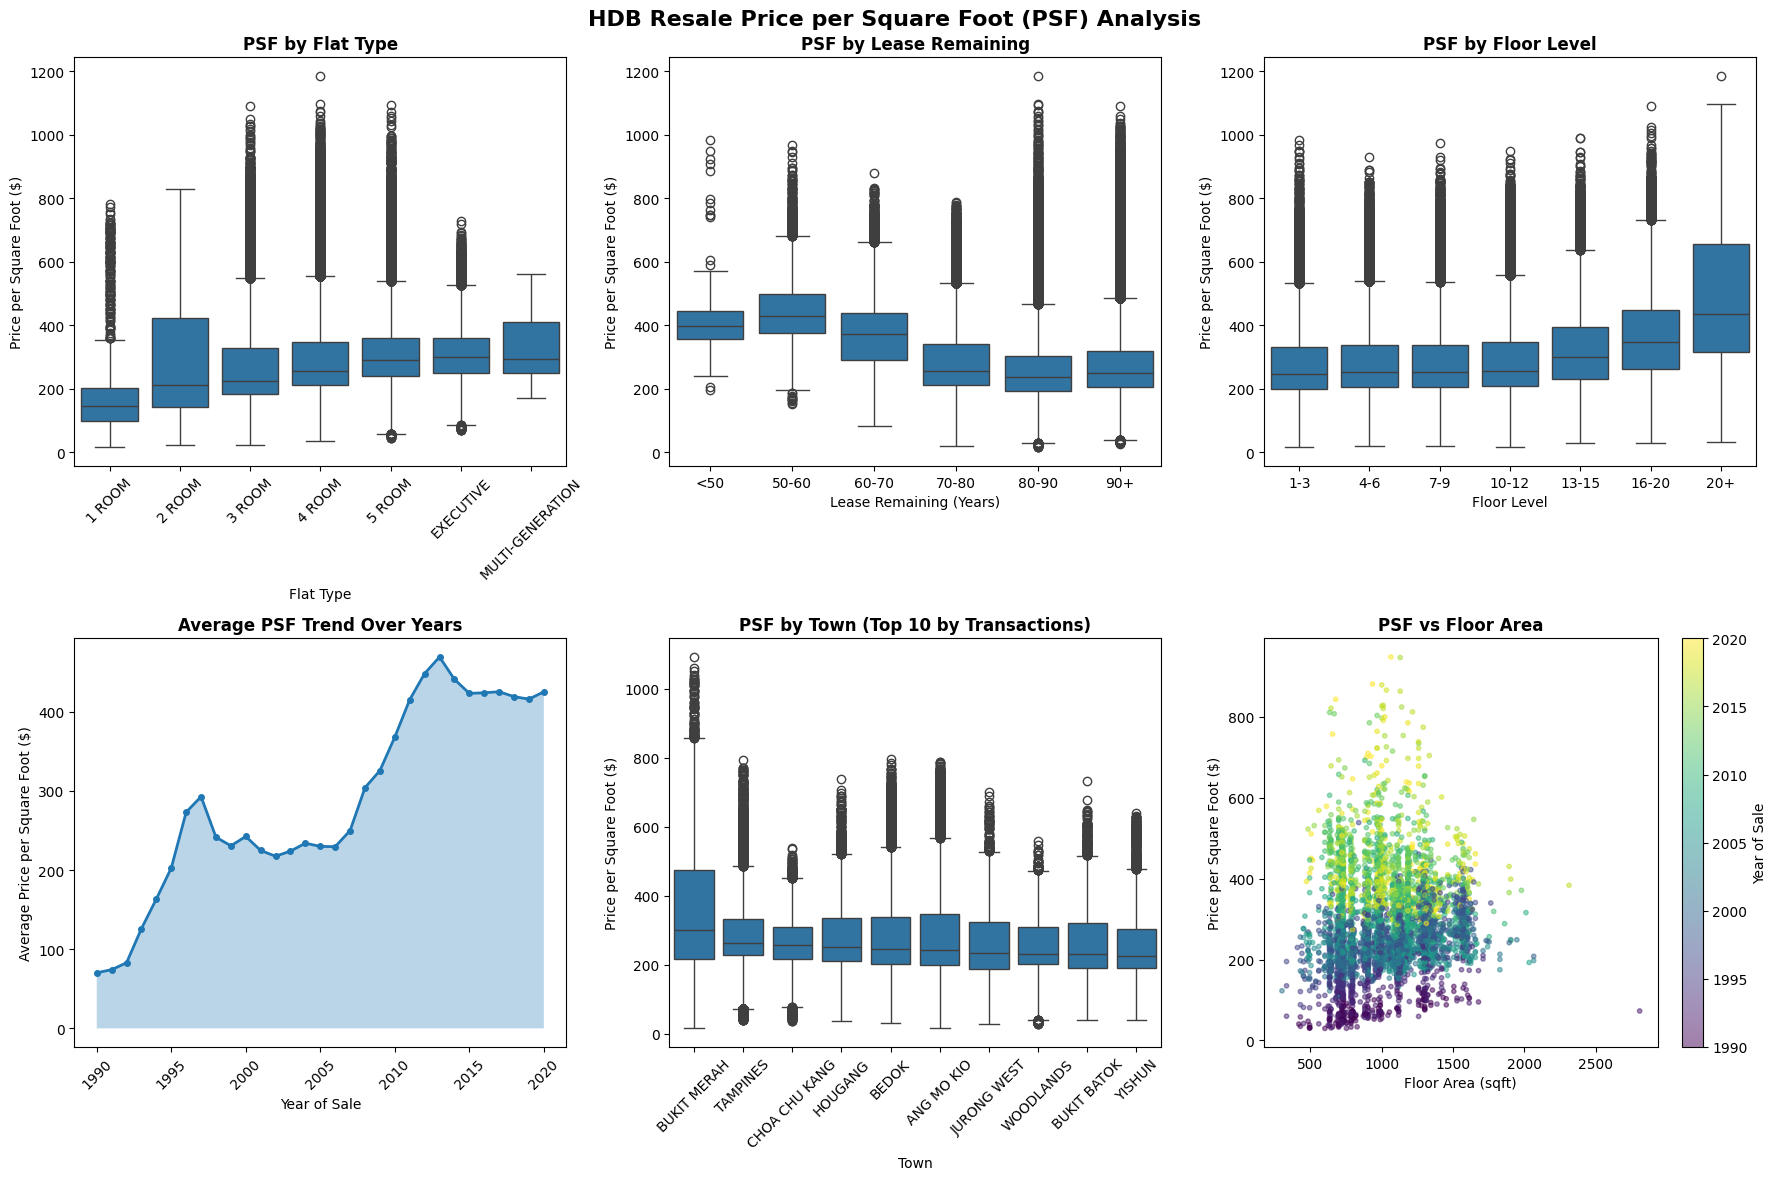

In [70]:
create_psf_visualizations(feature_selected_dfhdb)

Observation 
PSF by Flat Type
- General trend is as we move from 1 Room to Multi-Generation, the PSF starts to increase

PSF by Lease Remaining
- Does not show a linear trend to say that with more years remaining, it will be more expensive. 

PSF by Floor Level 
- Clear trend that as the floor increases , the PSF increases

Average PSF Trend over years 
- PSF have been icreasing over the years


In [71]:
def create_psf_visualizations(df):
    """
    Create visualizations showing how PSF (Price per Square Foot) varies with different features.
    
    PSF is the standard metric for comparing property prices across different sizes.
    Understanding PSF drivers helps buyers, sellers, and analysts assess fair value.
    """

    # Create 2x3 grid of subplots for comprehensive analysis
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle(
        "HDB Resale Price per Square Foot (PSF) Analysis",
        fontsize=16,
        fontweight="bold",
    )

    # 1. PSF by Flat Type
    ax1 = axes[0, 0]
    flat_type_order = [
        "1 ROOM",
        "2 ROOM",
        "3 ROOM",
        "4 ROOM",
        "5 ROOM",
        "EXECUTIVE",
        "MULTI-GENERATION",
    ]
    flat_type_order = [ft for ft in flat_type_order if ft in df["flat_type"].unique()]
    sns.boxplot(data=df, x="flat_type", y="psf", order=flat_type_order, ax=ax1)
    ax1.set_title("PSF by Flat Type", fontsize=12, fontweight="bold")
    ax1.set_xlabel("Flat Type")
    ax1.set_ylabel("Price per Square Foot ($)")
    ax1.tick_params(axis="x", rotation=45)
    
    # 2. PSF by Lease Remaining
    ax2 = axes[0, 1]
    # Create lease bins to group properties by remaining lease
    # <60 years faces financing restrictions; <50 years shows steep depreciation
    df["lease_bin"] = pd.cut(
        df["remaining_lease"],
        bins=[0, 50, 60, 70, 80, 90, 100],
        labels=["<50", "50-60", "60-70", "70-80", "80-90", "90+"],
    )
    sns.boxplot(data=df, x="lease_bin", y="psf", ax=ax2)
    ax2.set_title("PSF by Lease Remaining", fontsize=12, fontweight="bold")
    ax2.set_xlabel("Lease Remaining (Years)")
    ax2.set_ylabel("Price per Square Foot ($)")
    
    # 3. PSF by Floor Level (using minimum_floor)
    ax3 = axes[0, 2]
    # Create floor bins to analyze height premium
    # Higher floors typically command premium for better views, less noise
    df["floor_bin"] = pd.cut(
        df["storey_min"],
        bins=[0, 3, 6, 9, 12, 15, 20, 50],
        labels=["1-3", "4-6", "7-9", "10-12", "13-15", "16-20", "20+"],
    )
    sns.boxplot(data=df, x="floor_bin", y="psf", ax=ax3)
    ax3.set_title("PSF by Floor Level", fontsize=12, fontweight="bold")
    ax3.set_xlabel("Floor Level")
    ax3.set_ylabel("Price per Square Foot ($)")
    
    # 4. PSF Trend Over Time (Year of Sale)
    ax4 = axes[1, 0]
    yearly_psf = df.groupby("year_only")["psf"].mean().reset_index()
    ax4.plot(
        yearly_psf["year_only"],
        yearly_psf["psf"],
        marker="o",
        linewidth=2,
        markersize=4,
    )
    ax4.fill_between(yearly_psf["year_only"], yearly_psf["psf"], alpha=0.3)
    ax4.set_title("Average PSF Trend Over Years", fontsize=12, fontweight="bold")
    ax4.set_xlabel("Year of Sale")
    ax4.set_ylabel("Average Price per Square Foot ($)")
    ax4.tick_params(axis="x", rotation=45)
    
    # 5. PSF by Town (Top 10 towns by transaction count)
    ax5 = axes[1, 1]
    top_towns = df["town"].value_counts().head(10).index.tolist()
    df_top_towns = df[df["town"].isin(top_towns)]
    town_order = (
        df_top_towns.groupby("town")["psf"].median().sort_values(ascending=False).index
    )
    sns.boxplot(data=df_top_towns, x="town", y="psf", order=town_order, ax=ax5)
    ax5.set_title(
        "PSF by Town (Top 10 by Transactions)", fontsize=12, fontweight="bold"
    )
    ax5.set_xlabel("Town")
    ax5.set_ylabel("Price per Square Foot ($)")
    ax5.tick_params(axis="x", rotation=45)
    
    # 6. PSF vs Floor Area (Scatter)
    ax6 = axes[1, 2]
    # Sample data to avoid overplotting with 800k+ points
    sample_df = df.sample(
        n=min(5000, len(df)), random_state=42
    )
    # Color by year to show temporal trends
    # Generally: smaller units have higher PSF (economies of scale)
    scatter = ax6.scatter(
        sample_df["floor_area_sqft"],
        sample_df["psf"],
        c=sample_df["year_only"],
        cmap="viridis",
        alpha=0.5,
        s=10,
    )
    ax6.set_title("PSF vs Floor Area", fontsize=12, fontweight="bold")
    ax6.set_xlabel("Floor Area (sqft)")
    ax6.set_ylabel("Price per Square Foot ($)")
    cbar = plt.colorbar(scatter, ax=ax6)
    cbar.set_label("Year of Sale")
    
    plt.tight_layout()
    plt.savefig("psf_analysis_charts.png", dpi=150, bbox_inches="tight")
    plt.show()
    plt.close()

In [72]:
def create_psf_visualizations_2(df):
# Create a second figure with additional analyses
    fig2, axes2 = plt.subplots(2, 2, figsize=(14, 12))
    fig2.suptitle("Additional PSF Analysis", fontsize=16, fontweight="bold")

    # 7. Heatmap: PSF by Town and Flat Type
    ax7 = axes2[0, 0]
    pivot_table = df.pivot_table(
        values="psf", index="town", columns="flat_type", aggfunc="median"
    )
    # Select top towns
    top_towns_for_heatmap = df["town"].value_counts().head(12).index
    pivot_table = pivot_table.loc[pivot_table.index.isin(top_towns_for_heatmap)]
    sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlOrRd", ax=ax7)
    ax7.set_title("Median PSF: Town vs Flat Type", fontsize=12, fontweight="bold")
    ax7.set_xlabel("Flat Type")
    ax7.set_ylabel("Town")

    # 8. PSF Distribution
    ax8 = axes2[0, 1]
    ax8.hist(df["psf"], bins=50, edgecolor="black", alpha=0.7)
    ax8.axvline(
        df["psf"].median(),
        color="red",
        linestyle="--",
        linewidth=2,
        label=f'Median: ${df["psf"].median():.0f}',
    )
    ax8.axvline(
        df["psf"].mean(),
        color="green",
        linestyle="--",
        linewidth=2,
        label=f'Mean: ${df["psf"].mean():.0f}',
    )
    ax8.set_title("Distribution of PSF", fontsize=12, fontweight="bold")
    ax8.set_xlabel("Price per Square Foot ($)")
    ax8.set_ylabel("Frequency")
    ax8.legend()

    # 9. PSF by Built Year
    ax9 = axes2[1, 0]
    built_year_psf = df.groupby("lease_commence_date")["psf"].mean().reset_index()
    ax9.scatter(built_year_psf["lease_commence_date"], built_year_psf["psf"], alpha=0.6, s=20)
    # Add trend line
    z = np.polyfit(built_year_psf["lease_commence_date"], built_year_psf["psf"], 1)
    p = np.poly1d(z)
    ax9.plot(
        built_year_psf["lease_commence_date"],
        p(built_year_psf["lease_commence_date"]),
        "r--",
        linewidth=2,
        label="Trend",
    )
    ax9.set_title("Average PSF by Built Year", fontsize=12, fontweight="bold")
    ax9.set_xlabel("Built Year")
    ax9.set_ylabel("Average Price per Square Foot ($)")
    ax9.legend()

    # 10. Correlation heatmap for numerical features
    ax10 = axes2[1, 1]
    numeric_cols = [
        "psf",
        "resale_price",
        "floor_area_sqft",
        "floor_area_sqm",
        "remaining_lease",
        "storey_min",
        "storey_max",
        "lease_commence_date",
        "year_only",
        "month_only"
    ]
    corr_matrix = df[numeric_cols].corr()
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0, ax=ax10, fmt=".2f")
    ax10.set_title("Correlation Matrix", fontsize=12, fontweight="bold")

    plt.tight_layout()
    plt.savefig("psf_analysis_charts_2.png", dpi=150, bbox_inches="tight")
    plt.show()
    plt.close()

    print("Charts saved successfully!")

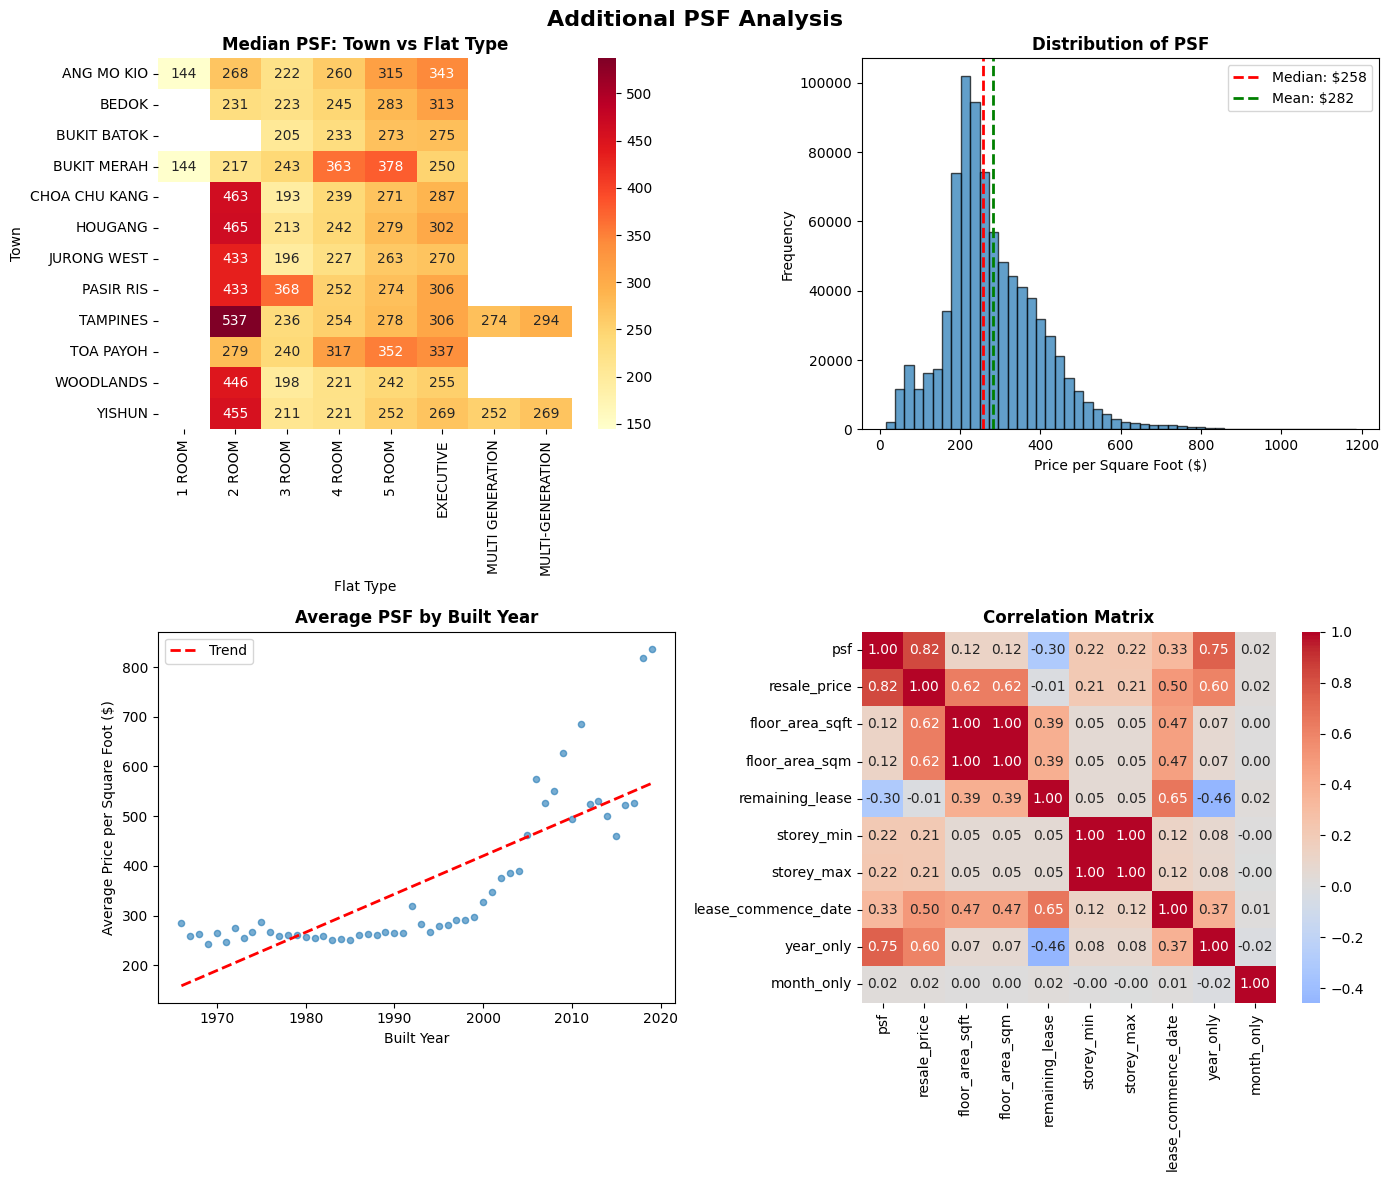

Charts saved successfully!


In [73]:
create_psf_visualizations_2(feature_selected_dfhdb)

In [74]:
# One hot encode featurs
one_hot_list = [
    'town',
    'flat_type',
    'flat_model',
    'road'
]

#resale_price will be dropped as it is indirectly the prediction we are making from psf
#psf will be dropped as it will be the predictor
scaling_list = [
    'floor_area_sqm',
    'lease_commence_date',
    'year_only',
    'month_only',
    'remaining_lease',
    'floor_area_sqft',
    'storey_min',
    'storey_max'
]

### Train Model

In [75]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [76]:
# here we call the new API set_config to tell sklearn we want to output a pandas DF
from sklearn import set_config

set_config(transform_output="pandas")

cat_columns_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse_output=False))
])

num_columns_pipeline = Pipeline(steps=[
    # ('scaler', StandardScaler()),
    ('min_max_scaler', MinMaxScaler())
])

column_preprocessor_pipeline = ColumnTransformer(transformers=[
    ('num', num_columns_pipeline, scaling_list),
    ('cat', cat_columns_pipeline, one_hot_list)
], remainder='passthrough')

main_preprocessing_pipeline = Pipeline(steps=[
        ('column_preprocessor', column_preprocessor_pipeline)
])

In [77]:
feature_selected_dfhdb = feature_selected_dfhdb[:1000]
y = feature_selected_dfhdb['psf']
feature_selected_dfhdb = feature_selected_dfhdb.drop(['psf', 'address', 'lease_bin', 'floor_bin', 'resale_price'], axis=1)
feature_selected_dfhdb

,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,month_only,year_only,remaining_lease,floor_area_sqft,storey_min,storey_max,road,price_is_geq_one_million
0,ANG MO KIO,1 ROOM,31,IMPROVED,1977,1,1990,86,333,10,12,ANG MO KIO AVENUE 1,0
1,ANG MO KIO,1 ROOM,31,IMPROVED,1977,1,1990,86,333,4,6,ANG MO KIO AVENUE 1,0
2,ANG MO KIO,1 ROOM,31,IMPROVED,1977,1,1990,86,333,10,12,ANG MO KIO AVENUE 1,0
3,ANG MO KIO,1 ROOM,31,IMPROVED,1977,1,1990,86,333,7,9,ANG MO KIO AVENUE 1,0
4,ANG MO KIO,3 ROOM,73,NEW GENERATION,1976,1,1990,85,785,4,6,ANG MO KIO AVENUE 1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,KALLANG/WHAMPOA,3 ROOM,65,IMPROVED,1975,1,1990,84,699,4,6,UPPER BOON KENG ROAD,0
996,KALLANG/WHAMPOA,3 ROOM,68,NEW GENERATION,1979,1,1990,88,731,4,6,GEYLANG BAHRU,0
997,KALLANG/WHAMPOA,3 ROOM,68,NEW GENERATION,1979,1,1990,88,731,13,15,GEYLANG BAHRU,0
998,KALLANG/WHAMPOA,3 ROOM,68,NEW GENERATION,1979,1,1990,88,731,4,6,DORSET ROAD,0


In [78]:
transformed_df = main_preprocessing_pipeline.fit_transform(feature_selected_dfhdb)
pd.DataFrame(transformed_df)

,num__floor_area_sqm,num__lease_commence_date,num__year_only,num__month_only,num__remaining_lease,num__floor_area_sqft,num__storey_min,num__storey_max,cat__town_ANG MO KIO,cat__town_BEDOK,...,cat__road_UPPER BOON KENG ROAD,cat__road_UPPER CROSS STREET,cat__road_VEERASAMY ROAD,cat__road_WATERLOO STREET,cat__road_WEST COAST DRIVE,cat__road_WEST COAST ROAD,cat__road_WHAMPOA DRIVE,cat__road_WHAMPOA WEST,cat__road_YUNG KUANG ROAD,remainder__price_is_geq_one_million
0,0.014925,0.526316,0.0,0.0,0.526316,0.014563,0.375,0.375,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.014925,0.526316,0.0,0.0,0.526316,0.014563,0.125,0.125,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.014925,0.526316,0.0,0.0,0.526316,0.014563,0.375,0.375,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.014925,0.526316,0.0,0.0,0.526316,0.014563,0.250,0.250,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.328358,0.473684,0.0,0.0,0.473684,0.328017,0.125,0.125,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.268657,0.421053,0.0,0.0,0.421053,0.268377,0.125,0.125,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
996,0.291045,0.631579,0.0,0.0,0.631579,0.290569,0.125,0.125,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
997,0.291045,0.631579,0.0,0.0,0.631579,0.290569,0.500,0.500,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
998,0.291045,0.631579,0.0,0.0,0.631579,0.290569,0.125,0.125,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [82]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [ ]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(transformed_df, y, test_size=0.2, random_state=42) 

In [ ]:
from sklearn.feature_selection import RFECV

#Use RFECV to determine with set of features give the best result
# Using RandomForest Regressor 
clf = RandomForestRegressor(random_state=42)
rfe = RFECV(clf,cv=5,scoring="r2", verbose=1, n_jobs=-1)

rfe.fit(X_train,y_train)

Fitting estimator with 189 features.Fitting estimator with 189 features.

Fitting estimator with 189 features.
Fitting estimator with 189 features.
Fitting estimator with 189 features.
Fitting estimator with 188 features.
Fitting estimator with 188 features.
Fitting estimator with 188 features.
Fitting estimator with 188 features.
Fitting estimator with 188 features.
Fitting estimator with 187 features.
Fitting estimator with 187 features.
Fitting estimator with 187 features.
Fitting estimator with 187 features.
Fitting estimator with 187 features.
Fitting estimator with 186 features.
Fitting estimator with 186 features.
Fitting estimator with 186 features.
Fitting estimator with 186 features.
Fitting estimator with 186 features.
Fitting estimator with 185 features.
Fitting estimator with 185 features.
Fitting estimator with 185 features.
Fitting estimator with 185 features.
Fitting estimator with 185 features.
Fitting estimator with 184 features.
Fitting estimator with 184 features.
F

,estimator estimator: ``Estimator`` instanceA supervised learning estimator with a ``fit`` method that providesinformation about feature importance either through a ``coef_``attribute or through a ``feature_importances_`` attribute.,RandomForestR...ndom_state=42)
,"step step: int or float, default=1If greater than or equal to 1, then ``step`` corresponds to the(integer) number of features to remove at each iteration.If within (0.0, 1.0), then ``step`` corresponds to the percentage(rounded down) of features to remove at each iteration.Note that the last iteration may remove fewer than ``step`` features inorder to reach ``min_features_to_select``.",1
,"min_features_to_select min_features_to_select: int, default=1The minimum number of features to be selected. This number of featureswill always be scored, even if the difference between the originalfeature count and ``min_features_to_select`` isn't divisible by``step``... versionadded:: 0.20",1
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross-validation,- integer, to specify the number of folds.- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if ``y`` is binary or multiclass,:class:`~sklearn.model_selection.StratifiedKFold` is used. If theestimator is not a classifier or if ``y`` is neither binary nor multiclass,:class:`~sklearn.model_selection.KFold` is used.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value of None changed from 3-fold to 5-fold.",5
,"scoring scoring: str or callable, default=NoneScoring method to evaluate the :class:`RFE` selectors' performance. Options:- str: see :ref:`scoring_string_names` for options.- callable: a scorer callable object (e.g., function) with signature ``scorer(estimator, X, y)``. See :ref:`scoring_callable` for details.- `None`: the `estimator`'s :ref:`default evaluation criterion ` is used.",'r2'
,"verbose verbose: int, default=0Controls verbosity of output.",1
,"n_jobs n_jobs: int or None, default=NoneNumber of cores to run in parallel while fitting across folds.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionadded:: 0.18",-1
,"importance_getter importance_getter: str or callable, default='auto'If 'auto', uses the feature importance either through a `coef_`or `feature_importances_` attributes of estimator.Also accepts a string that specifies an attribute name/pathfor extracting feature importance.For example, give `regressor_.coef_` in case of:class:`~sklearn.compose.TransformedTargetRegressor` or`named_steps.clf.feature_importances_` in case of:class:`~sklearn.pipeline.Pipeline` with its last step named `clf`.If `callable`, overrides the default feature importance getter.The callable is passed with the fitted estimator and it shouldreturn importance for each feature... versionadded:: 0.24",'auto'
,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significa

In [ ]:
# List out all the ranking result 
for i, features in enumerate(rfe.feature_names_in_):
    print(f'{i}_{features} has a support of {rfe.support_[i]} and ranking of {rfe.ranking_[i]}')

0_num__floor_area_sqm has a support of True and ranking of 1
1_num__lease_commence_date has a support of True and ranking of 1
2_num__year_only has a support of False and ranking of 145
3_num__month_only has a support of False and ranking of 142
4_num__remaining_lease has a support of True and ranking of 1
5_num__floor_area_sqft has a support of True and ranking of 1
6_num__storey_min has a support of True and ranking of 1
7_num__storey_max has a support of True and ranking of 1
8_cat__town_ANG MO KIO has a support of True and ranking of 1
9_cat__town_BEDOK has a support of True and ranking of 1
10_cat__town_BISHAN has a support of True and ranking of 1
11_cat__town_BUKIT BATOK has a support of True and ranking of 1
12_cat__town_BUKIT MERAH has a support of True and ranking of 1
13_cat__town_BUKIT TIMAH has a support of False and ranking of 38
14_cat__town_CENTRAL AREA has a support of True and ranking of 1
15_cat__town_CHOA CHU KANG has a support of True and ranking of 1
16_cat__town_

Use the selected features only

In [99]:
# Use the features which has support and have high ranking 
selected_features = np.array(rfe.feature_names_in_)[rfe.support_]

# Use the selected features
selected_X_train = X_train[selected_features]
selected_X_test = X_test[selected_features]
selected_features

array(['num__floor_area_sqm', 'num__lease_commence_date',
       'num__remaining_lease', 'num__floor_area_sqft', 'num__storey_min',
       'num__storey_max', 'cat__town_ANG MO KIO', 'cat__town_BEDOK',
       'cat__town_BISHAN', 'cat__town_BUKIT BATOK',
       'cat__town_BUKIT MERAH', 'cat__town_CENTRAL AREA',
       'cat__town_CHOA CHU KANG', 'cat__town_CLEMENTI',
       'cat__town_GEYLANG', 'cat__town_HOUGANG', 'cat__town_JURONG EAST',
       'cat__town_JURONG WEST', 'cat__town_KALLANG/WHAMPOA',
       'cat__flat_type_3 ROOM', 'cat__flat_type_4 ROOM',
       'cat__flat_model_APARTMENT', 'cat__flat_model_IMPROVED',
       'cat__flat_model_MODEL A', 'cat__flat_model_NEW GENERATION',
       'cat__flat_model_STANDARD', 'cat__road_ANG MO KIO AVENUE 6',
       'cat__road_BUKIT PURMEI ROAD', 'cat__road_CLEMENTI STREET 13',
       'cat__road_CLEMENTI STREET 14', 'cat__road_EUNOS CRESCENT',
       'cat__road_HOUGANG AVENUE 3', 'cat__road_HOUGANG STREET 11',
       'cat__road_JALAN BUKIT MERAH'

In [100]:
#Train the model using selected features
clf_2 = RandomForestRegressor(random_state=42)
clf_2.fit(selected_X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split

# Make predictions
y_pred_train = clf_2.predict(selected_X_train)
y_pred_test = clf_2.predict(selected_X_test)

 # Calculate metrics
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)

# Cross-validation score
cv_scores = cross_val_score(
    clf_2, selected_X_train, y_train, cv=5, scoring="r2", n_jobs=1
)
cv_mean = cv_scores.mean()
cv_std = cv_scores.std()
score = clf_2.score(selected_X_test, y_test)

print(f"Train R²: {train_r2}")
print(f"Test R²: {test_r2}")
print(f"CV R² (mean): {cv_mean}")
print(f"CV R² (std): {cv_std}")
print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")
print(f"Train MAE: {train_mae}")
print(f"Test MAE: {test_mae}")
print(f"Overfit Gap: {train_r2 - test_r2}")

Train R²: 0.963447185381873
Test R²: 0.7871488284429885
CV R² (mean): 0.7905239972516054
CV R² (std): 0.030259223802036037
Train RMSE: 4.505501539003693
Test RMSE: 10.19207229557836
Train MAE: 3.2606466288517004
Test MAE: 7.147536221625598
Overfit Gap: 0.17629835693888452


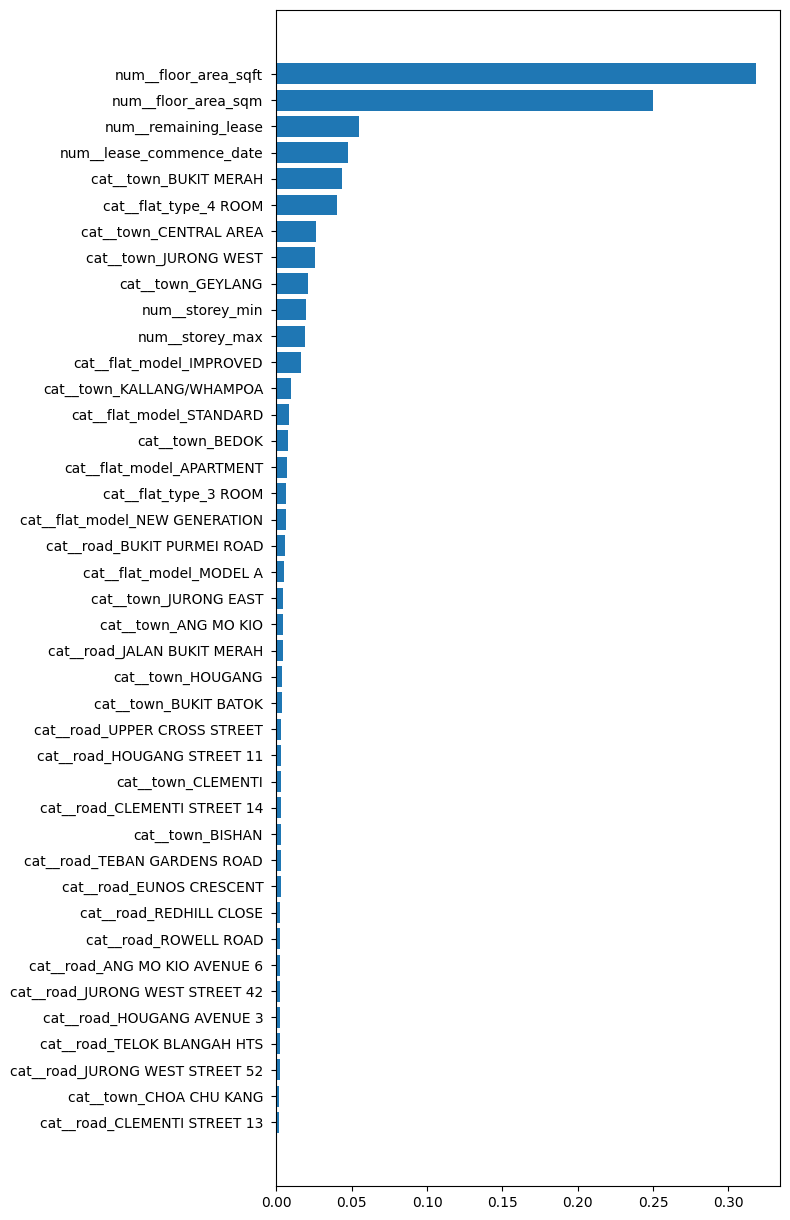

In [107]:
# Selected features and its importance
f_i = list(zip(clf_2.feature_names_in_,clf_2.feature_importances_))
f_i.sort(key = lambda x : x[1])

plt.figure(figsize=(8, len(f_i) * 0.3))
plt.barh(
    [x[0] for x in f_i],
    [x[1] for x in f_i]
)
ax = plt.gca()
ax.margins(y=0.05)
ax.tick_params(axis='y', pad=6)

plt.tight_layout()
plt.show()

# Model Prediction Task 2

Question : Explain the factors and considerations in building an in-house predictive model for users. You may use the above scenario to support your answer with reasonable assumptions.

**1) Business objective and requirements**
Defining Use case 
- Primary goal of the model : What decision will this model support?
- Target user : Who will be using the model. Example : public or internal staff
- Target Metric : If can predict the resale price within 10%, is that okay ?

**2) Data Considerations**
Data availability 
- How available the data are? Is it easy to access so that the model can be retrained and kept up to date.
- How clean is the data? Need to setup a pipeline to ensure the model is fed with clean data.

**Personal Data Protection Act (PDPA)**
- How are we going to keep the data anonymised and removed details to keep the data in compliance with the act

**3) Infrastructure requirement**
- Availability of GPU
- If there is no GPU, we have to use model which doesn't require GPU.Choose algorithms that perform well on CPU (e.g., XGBoost, LightGBM, Random Forest)
- Will the model be hosted locally or on cloud. If on cloud, we have to engage services like Google Compute Platform(gcp) or AWS.

**4) User Interface**
- Once the target user has been set, if it is public or non technical user we have to consider building a UI/UX . This will ensure that they can use the model with ease.

**5) Maintenance**
- The model needs regular maintenance so that it will perform at its best. Hence, an exisiting team or new team might be needed to upkeep this maintenance. Increasing the cost.

**6) Cost benefit**
- Will building in-house reduce the cost or actually increase the cost. Do keep in mind that in the short term, cost will increase to implement the system. We need to measure the long term effect and check if we are cutting down the cost and gain benefit.
